<a href="https://colab.research.google.com/github/Manisha-Karim/Age-and-Gender-prediction-using-CNN/blob/main/age_and_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential


In [3]:
from tensorflow.keras.utils import load_img

In [4]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [7]:
BASE_DIR = '/content/drive/MyDrive/Datasets/UTKFace'

# Dataset Creation


In [8]:
image_paths = []
age_labels = []
gender_labels = []

for filename in os.listdir(BASE_DIR):
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_path = os.path.join(BASE_DIR, filename)
    
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [9]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/Datasets/UTKFace/80_0_2...,80,0
1,/content/drive/MyDrive/Datasets/UTKFace/80_1_0...,80,1
2,/content/drive/MyDrive/Datasets/UTKFace/80_0_3...,80,0
3,/content/drive/MyDrive/Datasets/UTKFace/80_0_2...,80,0
4,/content/drive/MyDrive/Datasets/UTKFace/80_1_0...,80,1


# EDA


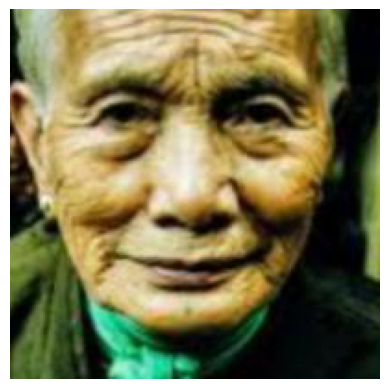

In [10]:
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<ipython-input-28-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

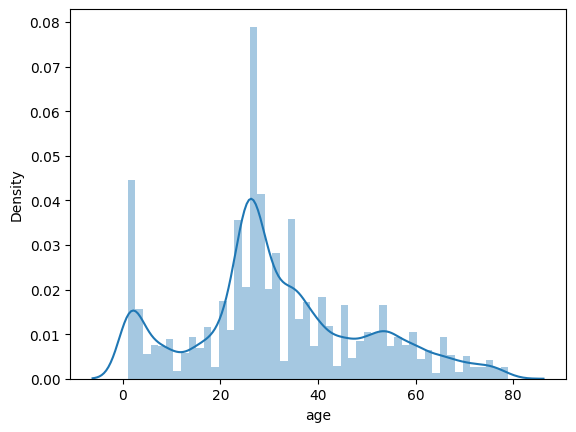

In [28]:
sns.distplot(df['age'])

In [27]:
df = df[df['age'] < 80]

In [25]:
df['gender'].value_counts()

0    12391
1    11357
Name: gender, dtype: int64

In [13]:
df['image'].shape

(23748,)

In [14]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [15]:
X = extract_features(df['image'])

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [16]:
X.shape

(23748, 128, 128, 1)

In [17]:
X = X/255.0

In [18]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Model Creation

In [29]:
inputs = Input((128,128,1))

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)


dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='linear', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mse'], optimizer='adam', metrics=['accuracy'])


In [30]:
history =  model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
594/594 [==============================] - 17s 23ms/step - loss: 350.0581 - gender_out_loss: 0.6536 - age_out_loss: 349.4047 - gender_out_accuracy: 0.5963 - age_out_accuracy: 0.0000e+00 - val_loss: 246.6833 - val_gender_out_loss: 0.6337 - val_age_out_loss: 246.0496 - val_gender_out_accuracy: 0.6535 - val_age_out_accuracy: 0.2358
Epoch 2/20
594/594 [==============================] - 13s 22ms/step - loss: 201.8609 - gender_out_loss: 0.4978 - age_out_loss: 201.3631 - gender_out_accuracy: 0.7679 - age_out_accuracy: 0.0000e+00 - val_loss: 146.1249 - val_gender_out_loss: 0.5335 - val_age_out_loss: 145.5915 - val_gender_out_accuracy: 0.7124 - val_age_out_accuracy: 0.1832
Epoch 3/20
594/594 [==============================] - 15s 25ms/step - loss: 155.0410 - gender_out_loss: 0.4245 - age_out_loss: 154.6165 - gender_out_accuracy: 0.8135 - age_out_accuracy: 0.0000e+00 - val_loss: 165.1032 - val_gender_out_loss: 0.5027 - val_age_out_loss: 164.6006 - val_gender_out_accuracy: 0.7347 - val

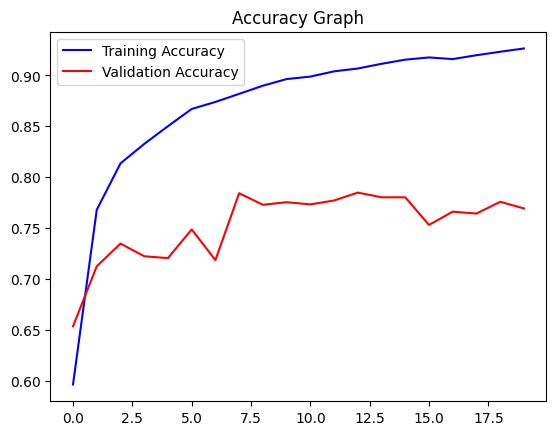

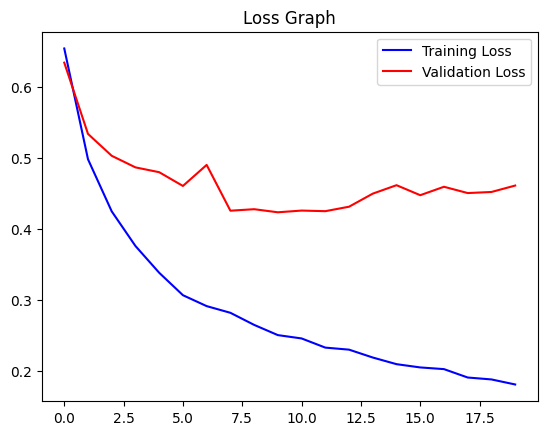

In [31]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


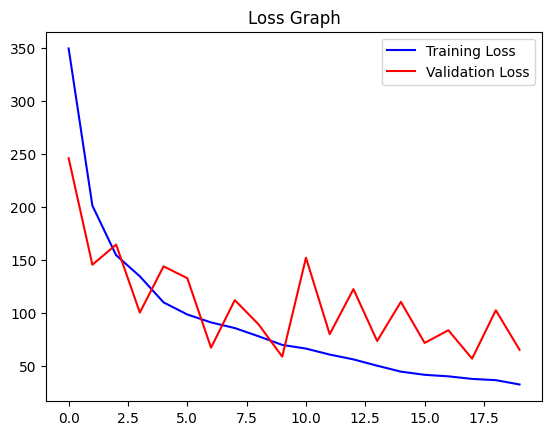

In [32]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()
